# Making a `seaborn` style pairplot from scratch using matplotlib

_Jordan Lubbers_ <br>
_U.S. Geological Survey Alaska Volcano Observatory_

seaborn's [PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html) and [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot) functions are great for visualizing many different variables in your data. They're quite high level and with the right amount of `matplotlib` knowledge one can access many different aspects of the figure or subplots, but I found myself wanting a little more control over each individual subplot. This tutorial walks through how to create a pairplot using `matplotlib`. It is many more lines of code but ultimately...as with anything in `matplotlib`... gives one the freedom to customize anything in the figure.

I'll be using some Alaskan tephra trace element chemistry from two sources to visualize various trace element ratios: proximal to volcanoes and offshore in the Gulf of Alaska. The data have been transformed using the centered logratio transform (Aitchison 1986) which is easily implemented using [`pyrolite`](https://pyrolite.readthedocs.io/en/main/examples/comp/logtransforms.html).

Let's begin by importing what we'll need


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pyrolite.plot import pyroplot

# custom plotting defaults and some functions
# for removing and labeling axes
# find it here: https://github.com/jlubbersgeo/general_geochem
import mpl_defaults



## Import data


In [2]:
prox_data = pd.read_excel(
    r"C:\Users\jlubbers\OneDrive - DOI\Research\Mendenhall\Data\B4_training_data_transformed.xlsx"
)
prox_data.head()


,volcano,eruption,latitude,longitude,Li,Ca,Sc,Ti,Mn,Zn,...,Ba/Th_std,Ba/La_std,Ba/Nb_std,La/Nb_std,Rb/Ba_std,La/Yb_std,Th/Yb_std,Th/La_std,Ce/Pb_std,Rb/Cs_std
0,Adagdak,Intermediate,51.9905,-176.5852,0.881791,7.442548,-0.197326,4.858358,4.410652,1.306839,...,0.152345,-0.948315,0.780581,-3.514251,-7.269981,-1.224116,-2.182974,-6.248229,-4.532286,-1.871628
1,Adagdak,Intermediate,51.9905,-176.5852,0.977264,7.240197,0.050812,4.932779,4.544906,0.707485,...,-0.054988,-1.606566,0.565007,-3.347013,-8.379653,-1.289317,-2.279888,-6.003329,-4.748882,-2.473030
2,Adagdak,Intermediate,51.9905,-176.5852,0.986837,7.472495,0.148540,5.093681,4.515304,0.897037,...,0.178558,-1.724810,0.110381,-3.990351,-8.346750,-1.184373,-2.075527,-5.715422,-5.153663,-3.020606
3,Adagdak,Intermediate,51.9905,-176.5852,0.798152,7.316529,-0.199501,4.885691,4.482373,1.172688,...,-0.241790,-1.117768,0.907737,-2.983776,-8.386560,-2.019302,-3.047885,-5.912390,-4.961904,-2.531660
4,Adagdak,Intermediate,51.9905,-176.5852,0.841787,7.108397,-0.031205,5.069557,4.414123,1.342778,...,-0.231694,-1.529224,0.958399,-3.055459,-8.108181,-3.358796,-3.388973,-5.723013,-4.816366,-2.216680


In [3]:
dist_data = pd.read_excel(
    r"C:\Users\jlubbers\OneDrive - DOI\Research\Mendenhall\Data\IODP_data_transformed.xlsx"
).set_index("IODP_sample")
dist_data.head()


,Age (yrs),Li,Ca,Sc,Ti,Mn,Zn,Rb,Sr,Y,...,Ba/Th_std,Ba/La_std,Ba/Nb_std,La/Nb_std,Rb/Ba_std,La/Yb_std,Th/Yb_std,Th/La_std,Ce/Pb_std,Rb/Cs_std
IODP_sample,,,,,,,,,,,,,,,,,,,,,
U1417D-1H-1W_3-5,100,1.572655,6.419230,0.590213,4.661129,3.739333,1.560982,1.961759,1.740023,1.564978,...,0.360380,-1.300078,0.830449,-3.103494,-7.980469,-3.734337,-4.675929,-6.049317,-3.970574,-1.528646
U1417D-1H-1W_3-5,100,1.442114,6.362170,0.438541,4.617201,3.672760,1.545860,1.828551,1.681829,1.536833,...,0.147293,-1.286555,0.710037,-3.172914,-8.005481,-3.579407,-4.585969,-6.049733,-3.306379,-1.424165
U1417D-1H-1W_3-5,100,1.586076,6.473830,0.589294,4.649338,3.728122,1.571818,1.955377,1.775384,1.583319,...,0.273297,-1.305239,0.783077,-3.170954,-7.992951,-3.838965,-4.644759,-5.972989,-3.925227,-1.580335
U1417D-1H-1W_3-5,100,1.570987,6.445707,0.596772,4.639157,3.740201,1.350332,1.944453,1.771792,1.616926,...,0.270553,-1.312990,0.854154,-3.076701,-8.021946,-3.641086,-4.520322,-5.996754,-3.932975,-1.556461
U1417D-1H-1W_3-5,100,1.503143,6.446567,0.548687,4.637282,3.736291,1.219885,1.928101,1.762772,1.605902,...,0.294067,-1.312981,0.797628,-3.151299,-8.054107,-3.595472,-4.528667,-6.002942,-3.910153,-1.582311


## Building the grid

With our data imported we're ready to declare some variables for plotting. This will be in the form of a list. Because I already know that these have nice data distributions we'll choose the following: Ba/Nb, Sr/Y, Th/La, Ce/Pb.

In its simplest form, a pairplot is "everything plotted against everything"...e.g. a square matrix of plots where 1D distributions are plotted along the diagonals.


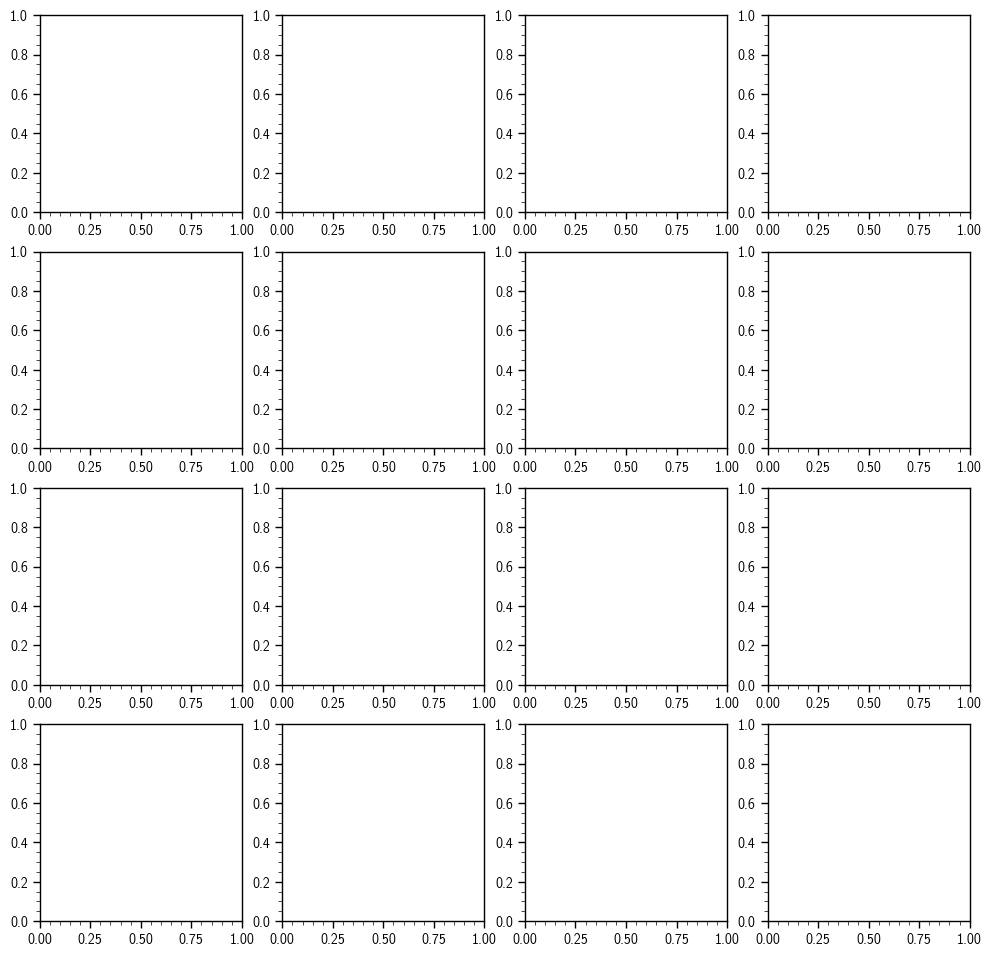

In [4]:
vars = ["Ba/Nb", "Sr/Y", "Th/La", "Ce/Pb"]
n = len(vars)
fig, ax = plt.subplots(n, n, figsize=(3 * n, 3 * n))



What we need to be able to reliably do is access 3 regions of the square matrix:

1. the diagonals
2. the lower triangle (bottom left from the diagonal)
3. the upper triangle (upper right from the diagonal)

Fortunately `numpy` has got our back here. They have functions to access all of these! Below we create arrays of the subplot indices for each region such that we have a way to plot each region using a loop


In [5]:
upper_indices = np.array(np.where(np.triu(ax, k=1))).T
lower_indices = np.array(np.where(np.tril(ax, k=-1))).T
diag_indices = np.array(np.where(np.eye(ax.shape[0], dtype=bool))).T
all_indices = np.vstack([upper_indices, lower_indices, diag_indices])
diag_indices


array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3]], dtype=int64)

For example, if I want to turn off the upper right triangle (as this is the same information but with flipped axes as the lower left triangle)...analagous to `corner = True` in `seaborn`, we can just loop through each axis in `upper_indices` and turn off the axis!


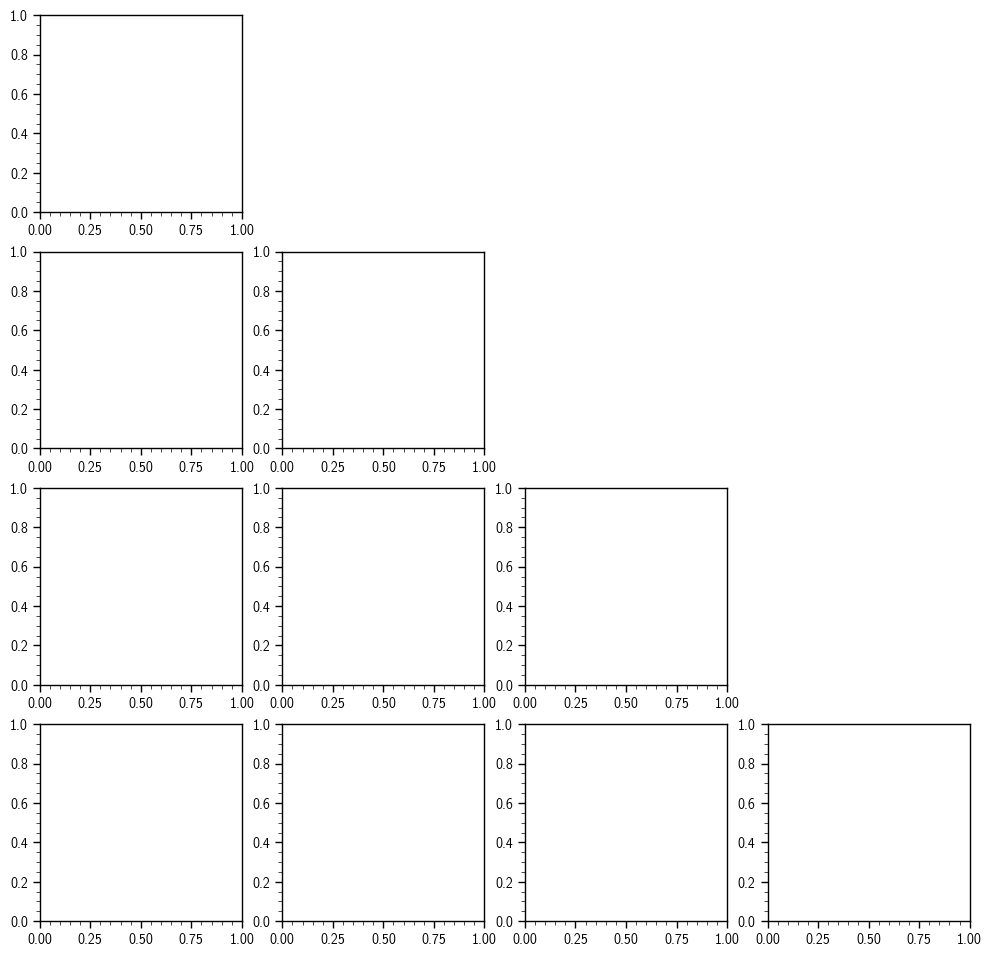

In [6]:
fig, ax = plt.subplots(n, n, figsize=(3 * n, 3 * n))
# remove the upper triangle axes
for coords in upper_indices:
    ax[coords[0], coords[1]].axis("off")



To remove all but the bottom spine on the diagonal:


In [7]:
# helper function for removing the top, bottom,
# and right spines for a simple looking plot
def bottom_only_axes(ax):

    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.get_xaxis().tick_bottom()
    ax.set_facecolor("white")



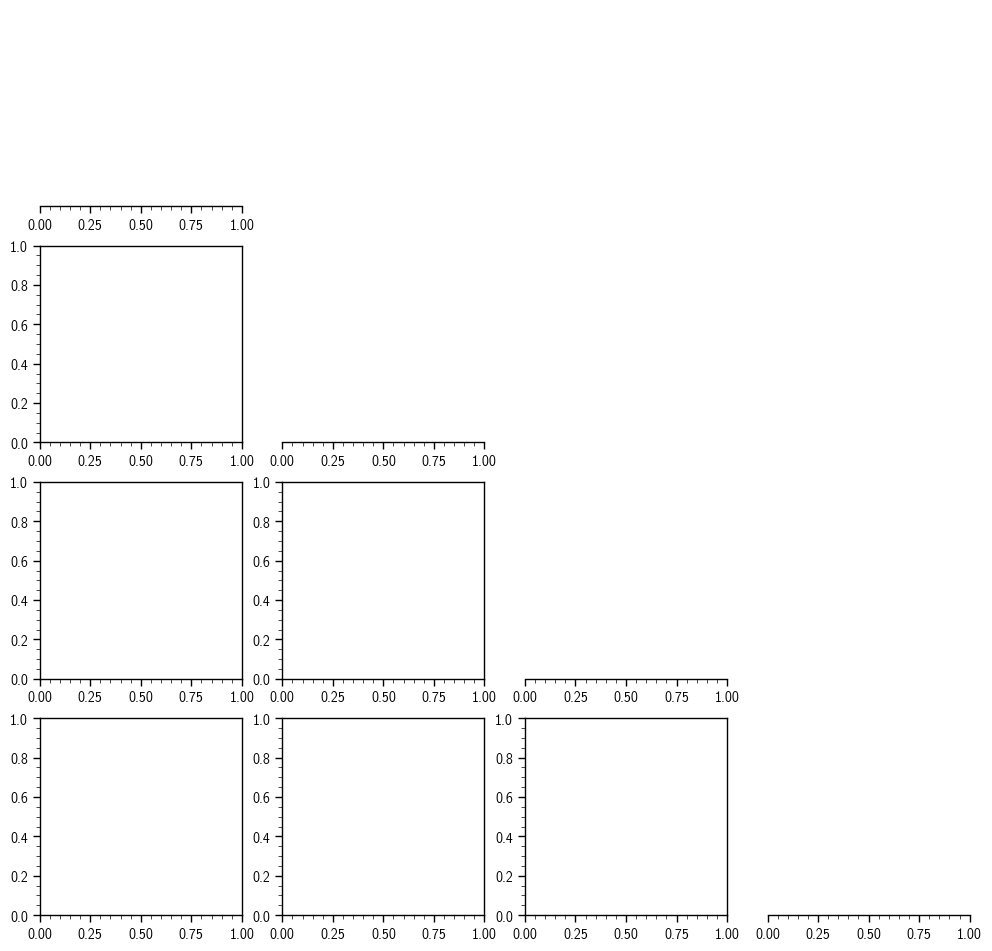

In [8]:
fig, ax = plt.subplots(n, n, figsize=(3 * n, 3 * n))
# remove the upper triangle axes
for coords in upper_indices:
    ax[coords[0], coords[1]].axis("off")

for coords in diag_indices:
    bottom_only_axes(ax[coords[0], coords[1]])



## Adding data

Adding data to each region is now as easy as recursively plotting in each axis. Because we have declared our variables for plotting as a list we can access it in the same way we do our grid of axes. It gets a little confusing here because the axes are organized as `[rows,columns]` which is `[xvar,yvar]` e.g., each column has the same x variable and each row has the same y variable.


In [9]:
for coords in lower_indices:
    print(f"[{coords[1]},{coords[0]}]: x = {vars[coords[1]]}   y = {vars[coords[0]]}")



[0,1]: x = Ba/Nb   y = Sr/Y
[0,2]: x = Ba/Nb   y = Th/La
[1,2]: x = Sr/Y   y = Th/La
[0,3]: x = Ba/Nb   y = Ce/Pb
[1,3]: x = Sr/Y   y = Ce/Pb
[2,3]: x = Th/La   y = Ce/Pb


Starting with the diagonals


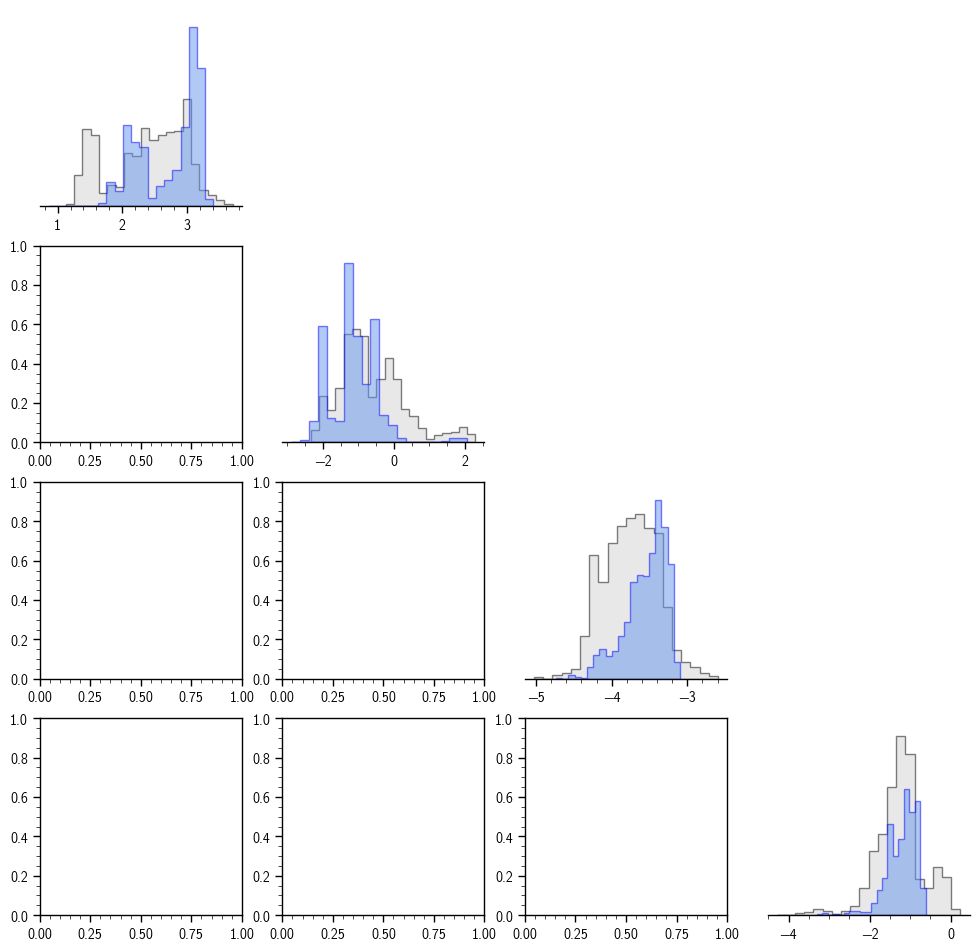

In [10]:
fig, ax = plt.subplots(n, n, figsize=(3 * n, 3 * n))
# remove the upper triangle axes
for coords in upper_indices:
    ax[coords[0], coords[1]].axis("off")

for coords in diag_indices:
    # remove all but the bottom spine
    bottom_only_axes(ax[coords[0], coords[1]])

    # dataset 1
    ax[coords[0], coords[1]].hist(
        prox_data[vars[coords[0]]],
        histtype="stepfilled",
        bins=20,
        facecolor="lightgray",
        edgecolor="k",
        alpha=0.5,
    )
    # dataset 2
    ax[coords[0], coords[1]].hist(
        dist_data[vars[coords[0]]],
        histtype="stepfilled",
        bins=20,
        facecolor="cornflowerblue",
        edgecolor="blue",
        alpha=0.5,
    )



Adding in the scatter for the lower diagonal


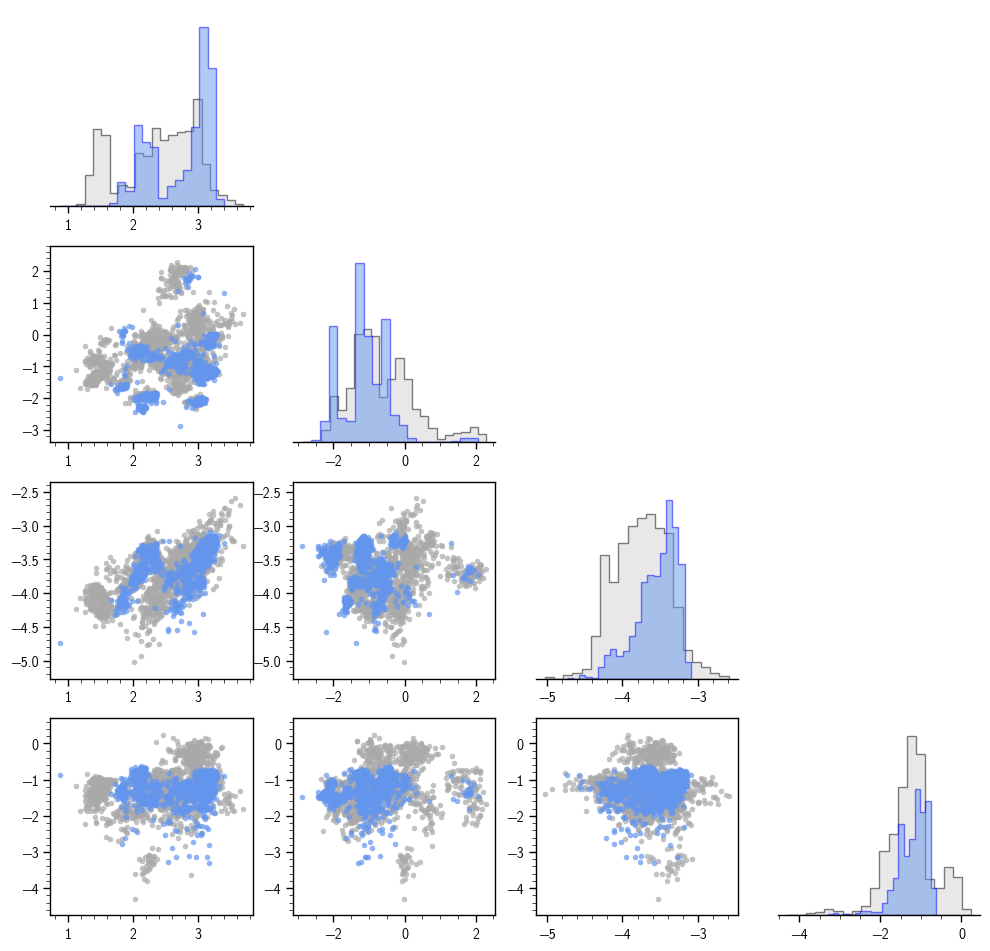

In [11]:
fig, ax = plt.subplots(n, n, figsize=(3 * n, 3 * n))
# remove the upper triangle axes
for coords in upper_indices:
    ax[coords[0], coords[1]].axis("off")

for coords in diag_indices:
    # remove all but the bottom spine
    bottom_only_axes(ax[coords[0], coords[1]])
    # dataset 1
    ax[coords[0], coords[1]].hist(
        prox_data[vars[coords[0]]],
        histtype="stepfilled",
        bins=20,
        facecolor="lightgray",
        edgecolor="k",
        alpha=0.5,
    )
    # dataset 2
    ax[coords[0], coords[1]].hist(
        dist_data[vars[coords[0]]],
        histtype="stepfilled",
        bins=20,
        facecolor="cornflowerblue",
        edgecolor="blue",
        alpha=0.5,
    )


# plot the lower triangle axes
for coords in lower_indices:
    # scatter plots for both groups
    ax[coords[0], coords[1]].plot(
        prox_data[vars[coords[1]]],
        prox_data[vars[coords[0]]],
        marker="o",
        ls="",
        ms=4,
        mfc="darkgray",
        mew=0,
        alpha=0.7,
    )

    ax[coords[0], coords[1]].plot(
        dist_data[vars[coords[1]]],
        dist_data[vars[coords[0]]],
        marker="o",
        ls="",
        ms=4,
        mfc="cornflowerblue",
        mew=0,
        alpha=0.7,
    )



Up until now this has largely been something one can do in `seaborn` quite easily with the exception of individually tweaking the `kwargs` for each group being plotted. To get outside of ```seaborn``` capabilities, next we will add in a 90% density contour for each dataset using `pyrolite`. A good example on that functionality can be found [here](https://pyrolite.readthedocs.io/en/develop/examples/plotting/density.html). This may be helpful if one has a lot of points (like the plots here showing over 2000) to be displayed in small 2D space as it shows where most of them plot. Our eyes are naturally drawn to differences and outliers so let's help guide them!


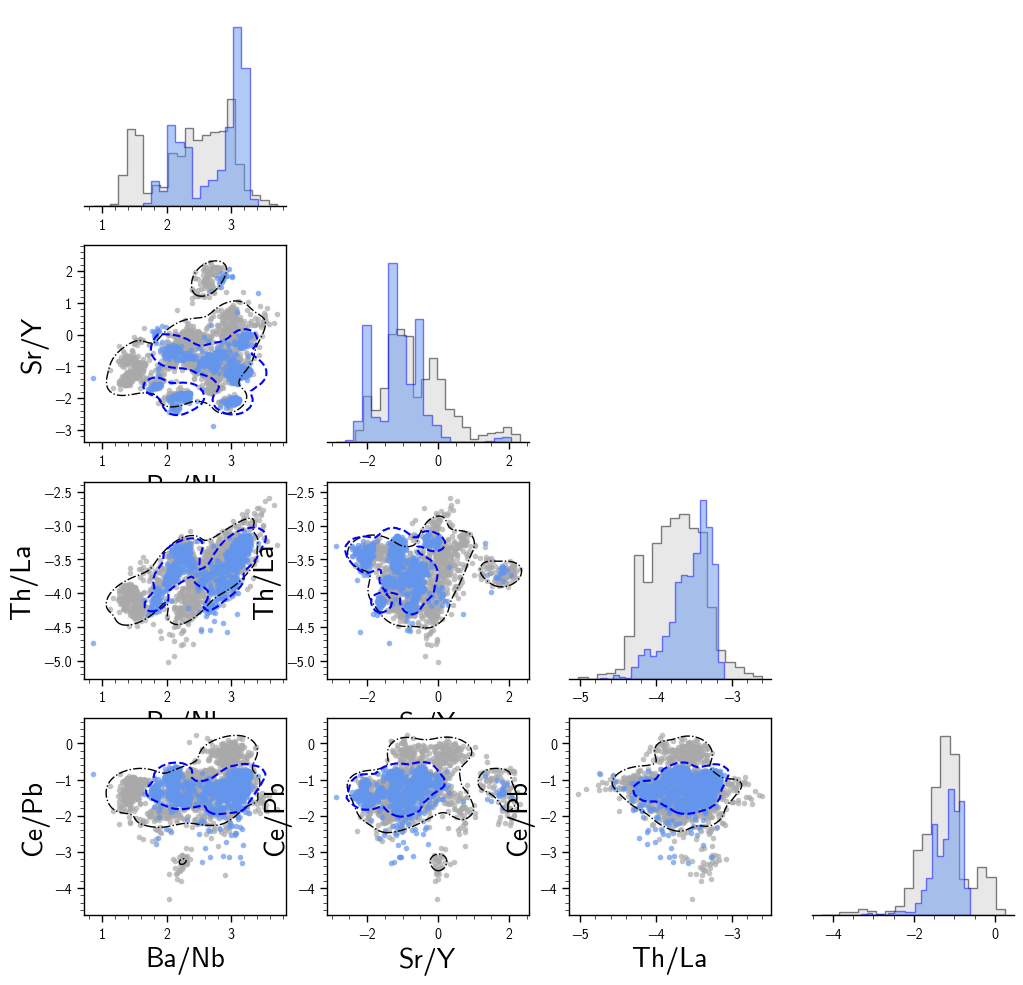

In [12]:
fig, ax = plt.subplots(n, n, figsize=(3 * n, 3 * n))
# remove the upper triangle axes
for coords in upper_indices:
    ax[coords[0], coords[1]].axis("off")

for coords in diag_indices:
    # remove all but the bottom spine
    bottom_only_axes(ax[coords[0], coords[1]])
    # dataset 1
    ax[coords[0], coords[1]].hist(
        prox_data[vars[coords[0]]],
        histtype="stepfilled",
        bins=20,
        facecolor="lightgray",
        edgecolor="k",
        alpha=0.5,
    )
    # dataset 2
    ax[coords[0], coords[1]].hist(
        dist_data[vars[coords[0]]],
        histtype="stepfilled",
        bins=20,
        facecolor="cornflowerblue",
        edgecolor="blue",
        alpha=0.5,
    )


# plot the lower triangle axes
for coords in lower_indices:
    # scatter plots for both groups
    ax[coords[0], coords[1]].plot(
        prox_data[vars[coords[1]]],
        prox_data[vars[coords[0]]],
        marker="o",
        ls="",
        ms=4,
        mfc="darkgray",
        mew=0,
        alpha=0.7,
    )

    ax[coords[0], coords[1]].plot(
        dist_data[vars[coords[1]]],
        dist_data[vars[coords[0]]],
        marker="o",
        ls="",
        ms=4,
        mfc="cornflowerblue",
        mew=0,
        alpha=0.7,
    )
    # pyrolite density contours for both groups
    prox_data.loc[:, [vars[coords[1]], vars[coords[0]]]].pyroplot.density(
        ax=ax[coords[0], coords[1]],
        bins=100,
        contours=[0.90],
        colors="black",
        linestyles="-.",
        linewidths=1,
        label_contours=False,
        zorder=10,
        extent=(
            ax[coords[0], coords[1]].get_xlim()[0],
            ax[coords[0], coords[1]].get_xlim()[1],
            ax[coords[0], coords[1]].get_ylim()[0],
            ax[coords[0], coords[1]].get_ylim()[1],
        ),
    )
    dist_data.loc[:, [vars[coords[1]], vars[coords[0]]]].pyroplot.density(
        ax=ax[coords[0], coords[1]],
        bins=50,
        contours=[0.90],
        colors="blue",
        linestyles="--",
        linewidths=1.5,
        label_contours=False,
        zorder=10,
        extent=(
            ax[coords[0], coords[1]].get_xlim()[0],
            ax[coords[0], coords[1]].get_xlim()[1],
            ax[coords[0], coords[1]].get_ylim()[0],
            ax[coords[0], coords[1]].get_ylim()[1],
        ),
    )


The plotting functions within pyrolite are smart and will auto label your axes based on the columns they pull from the dataframe. In this particular case, however, many of the labels are redundant so we turn them off and add them back in where appropriate (e.g., only the first column will get y labels and only the bottom row will get x labels)


Text(0, 0.5, '')

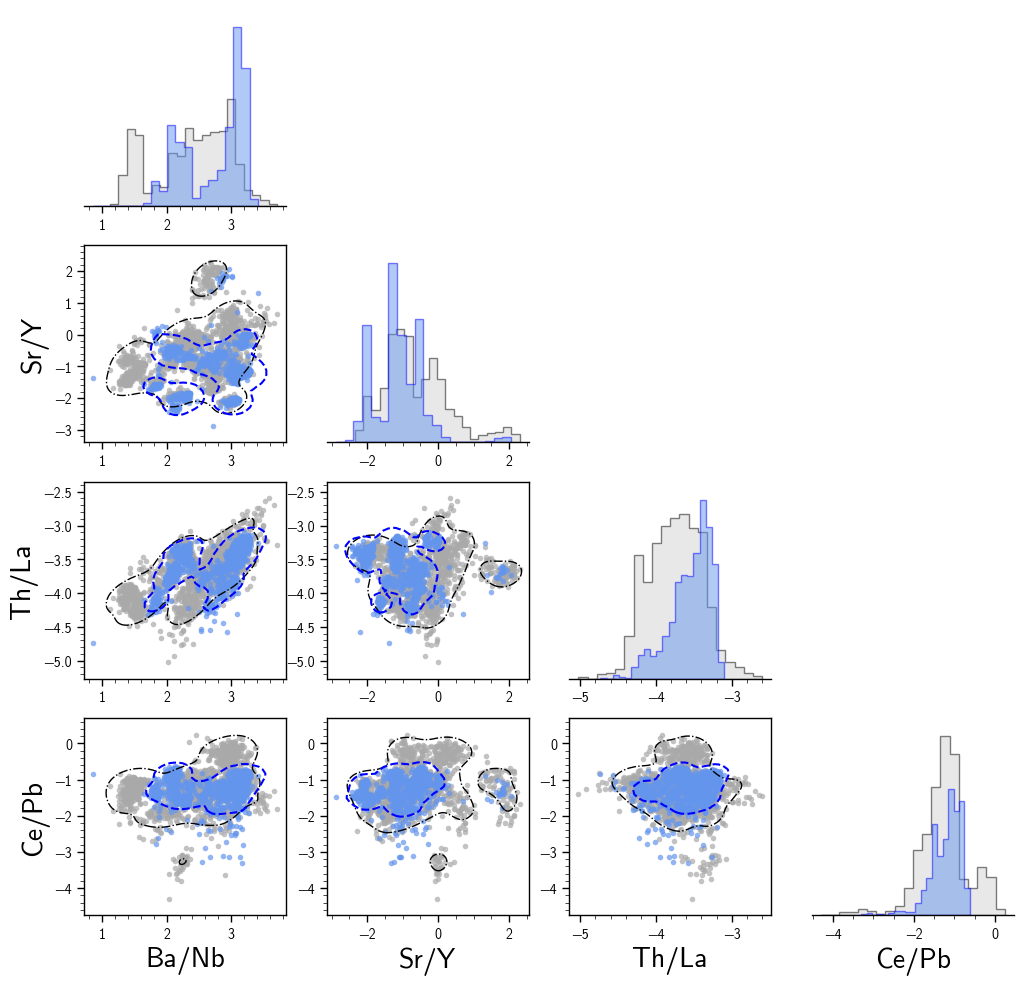

In [13]:
fig, ax = plt.subplots(n, n, figsize=(3 * n, 3 * n))
# remove the upper triangle axes
for coords in upper_indices:
    ax[coords[0], coords[1]].axis("off")

for coords in diag_indices:
    # remove all but the bottom spine
    bottom_only_axes(ax[coords[0], coords[1]])
    # dataset 1
    ax[coords[0], coords[1]].hist(
        prox_data[vars[coords[0]]],
        histtype="stepfilled",
        bins=20,
        facecolor="lightgray",
        edgecolor="k",
        alpha=0.5,
    )
    # dataset 2
    ax[coords[0], coords[1]].hist(
        dist_data[vars[coords[0]]],
        histtype="stepfilled",
        bins=20,
        facecolor="cornflowerblue",
        edgecolor="blue",
        alpha=0.5,
    )


# plot the lower triangle axes
for coords in lower_indices:
    # scatter plots for both groups
    ax[coords[0], coords[1]].plot(
        prox_data[vars[coords[1]]],
        prox_data[vars[coords[0]]],
        marker="o",
        ls="",
        ms=4,
        mfc="darkgray",
        mew=0,
        alpha=0.7,
    )

    ax[coords[0], coords[1]].plot(
        dist_data[vars[coords[1]]],
        dist_data[vars[coords[0]]],
        marker="o",
        ls="",
        ms=4,
        mfc="cornflowerblue",
        mew=0,
        alpha=0.7,
    )
    # pyrolite density contours for both groups
    prox_data.loc[:, [vars[coords[1]], vars[coords[0]]]].pyroplot.density(
        ax=ax[coords[0], coords[1]],
        bins=100,
        contours=[0.90],
        colors="black",
        linestyles="-.",
        linewidths=1,
        label_contours=False,
        zorder=10,
        extent=(
            ax[coords[0], coords[1]].get_xlim()[0],
            ax[coords[0], coords[1]].get_xlim()[1],
            ax[coords[0], coords[1]].get_ylim()[0],
            ax[coords[0], coords[1]].get_ylim()[1],
        ),
    )
    dist_data.loc[:, [vars[coords[1]], vars[coords[0]]]].pyroplot.density(
        ax=ax[coords[0], coords[1]],
        bins=50,
        contours=[0.90],
        colors="blue",
        linestyles="--",
        linewidths=1.5,
        label_contours=False,
        zorder=10,
        extent=(
            ax[coords[0], coords[1]].get_xlim()[0],
            ax[coords[0], coords[1]].get_xlim()[1],
            ax[coords[0], coords[1]].get_ylim()[0],
            ax[coords[0], coords[1]].get_ylim()[1],
        ),
    )
# remove all the x and y labels that get auto populated
# from pyrolite
for coords in all_indices:
    ax[coords[0], coords[1]].set_xlabel("")
    ax[coords[0], coords[1]].set_ylabel("")


# set the x and y labels on the left and bottom axes
for xcoords, ycoords in zip(
    all_indices[all_indices[:, 0] == n - 1], all_indices[all_indices[:, 1] == 0]
):
    ax[xcoords[0], xcoords[1]].set_xlabel(vars[xcoords[1]])
    ax[ycoords[0], ycoords[1]].set_ylabel(vars[ycoords[0]])

# remove the top left y label because its technically a diagonal plot
ax[0, 0].set_ylabel("")


Finally, we remove the inner tick labels to clean up the plot, reduce the spacing between plots, and add a custom legend!


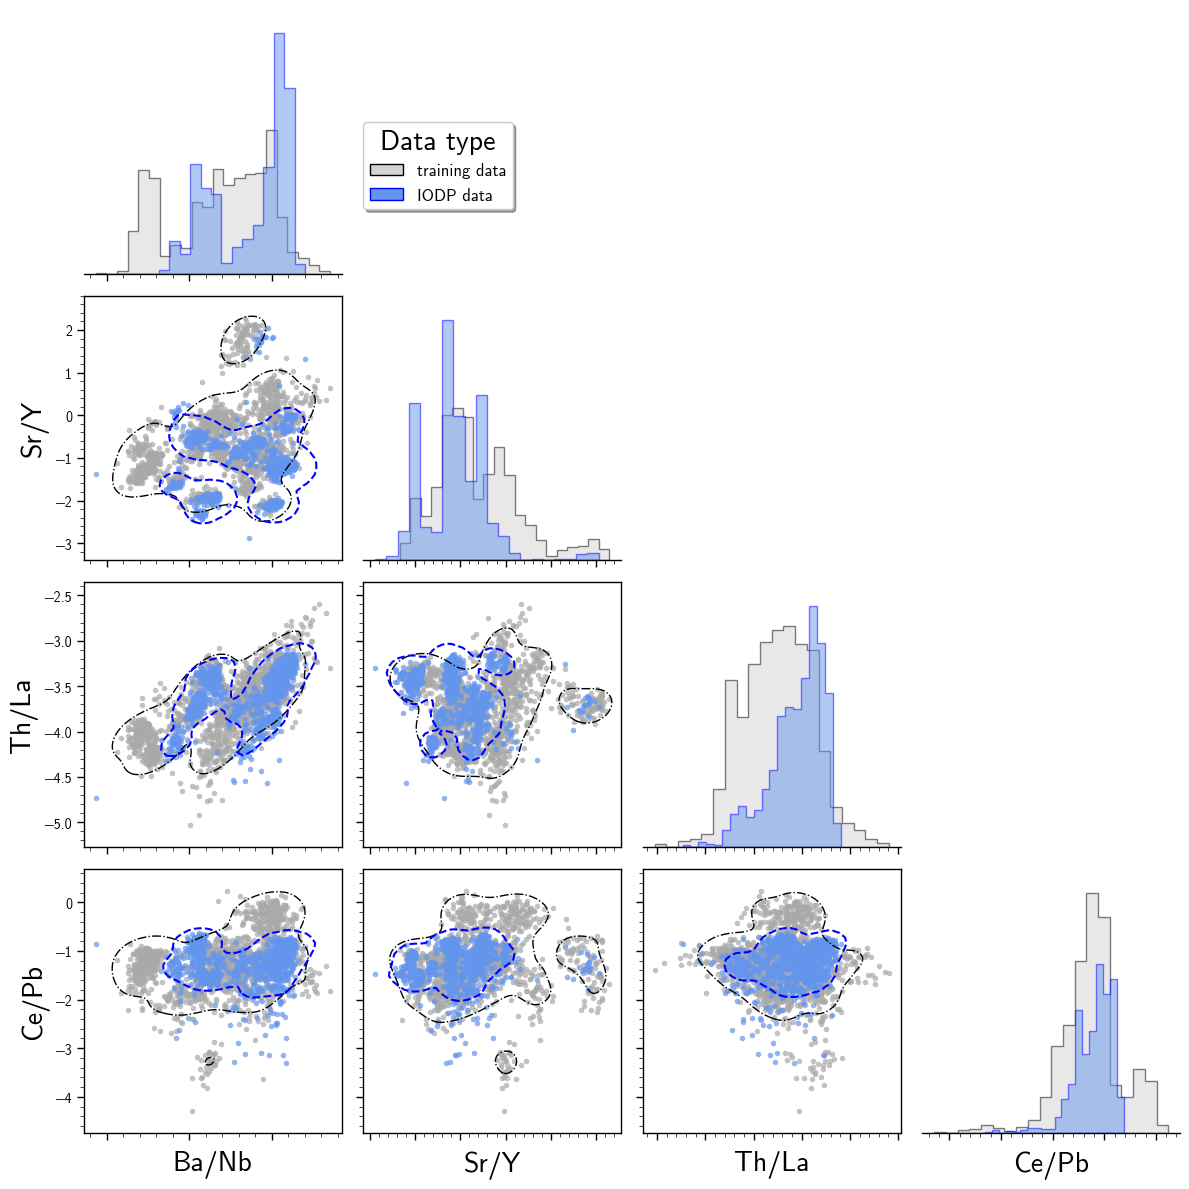

In [14]:
fig, ax = plt.subplots(n, n, figsize=(3 * n, 3 * n))
# remove the upper triangle axes
for coords in upper_indices:
    ax[coords[0], coords[1]].axis("off")

for coords in diag_indices:
    # remove all but the bottom spine
    bottom_only_axes(ax[coords[0], coords[1]])
    # dataset 1
    ax[coords[0], coords[1]].hist(
        prox_data[vars[coords[0]]],
        histtype="stepfilled",
        bins=20,
        facecolor="lightgray",
        edgecolor="k",
        alpha=0.5,
    )
    # dataset 2
    ax[coords[0], coords[1]].hist(
        dist_data[vars[coords[0]]],
        histtype="stepfilled",
        bins=20,
        facecolor="cornflowerblue",
        edgecolor="blue",
        alpha=0.5,
    )


# plot the lower triangle axes
for coords in lower_indices:
    # scatter plots for both groups
    ax[coords[0], coords[1]].plot(
        prox_data[vars[coords[1]]],
        prox_data[vars[coords[0]]],
        marker="o",
        ls="",
        ms=4,
        mfc="darkgray",
        mew=0,
        alpha=0.7,
    )

    ax[coords[0], coords[1]].plot(
        dist_data[vars[coords[1]]],
        dist_data[vars[coords[0]]],
        marker="o",
        ls="",
        ms=4,
        mfc="cornflowerblue",
        mew=0,
        alpha=0.7,
    )
    # pyrolite density contours for both groups
    prox_data.loc[:, [vars[coords[1]], vars[coords[0]]]].pyroplot.density(
        ax=ax[coords[0], coords[1]],
        bins=100,
        contours=[0.90],
        colors="black",
        linestyles="-.",
        linewidths=1,
        label_contours=False,
        zorder=10,
        extent=(
            ax[coords[0], coords[1]].get_xlim()[0],
            ax[coords[0], coords[1]].get_xlim()[1],
            ax[coords[0], coords[1]].get_ylim()[0],
            ax[coords[0], coords[1]].get_ylim()[1],
        ),
    )
    dist_data.loc[:, [vars[coords[1]], vars[coords[0]]]].pyroplot.density(
        ax=ax[coords[0], coords[1]],
        bins=50,
        contours=[0.90],
        colors="blue",
        linestyles="--",
        linewidths=1.5,
        label_contours=False,
        zorder=10,
        extent=(
            ax[coords[0], coords[1]].get_xlim()[0],
            ax[coords[0], coords[1]].get_xlim()[1],
            ax[coords[0], coords[1]].get_ylim()[0],
            ax[coords[0], coords[1]].get_ylim()[1],
        ),
    )
# remove all the x and y labels that get auto populated
# from pyrolite
for coords in all_indices:
    ax[coords[0], coords[1]].set_xlabel("")
    ax[coords[0], coords[1]].set_ylabel("")


# set the x and y labels on the left and bottom axes
for xcoords, ycoords in zip(
    all_indices[all_indices[:, 0] == n - 1], all_indices[all_indices[:, 1] == 0]
):
    ax[xcoords[0], xcoords[1]].set_xlabel(vars[xcoords[1]])
    ax[ycoords[0], ycoords[1]].set_ylabel(vars[ycoords[0]])

# remove the top left y label because its technically a diagonal plot
ax[0, 0].set_ylabel("")
# removing inner x and y tick labels so the figure reads cleaner
for coords in all_indices:
    if coords[1] != 0:
        ax[coords[0], coords[1]].set_yticklabels("")
    if coords[0] != 4:
        ax[coords[0], coords[1]].set_xticklabels("")

# custom legend
legend_elements = [
    Patch(facecolor="lightgray", edgecolor="k", label="training data"),
    Patch(facecolor="cornflowerblue", edgecolor="blue", label="IODP data"),
]
# add the legend
fig.legend(
    handles=legend_elements,
    bbox_to_anchor=[0.3, 0.9],
    title="Data type",
    title_fontsize=20,
    fontsize=12,
    frameon=True,
    shadow=True,
    facecolor="w",
)
# decrease the spacing between the plots
fig.tight_layout()


Was this easier than ```seaborn```? Certainly not. ```seaborn``` is fantastic and I use it for the bulk of my work as it has almost everything I need. In this instance it did not so I built this tutorial as a good exercise on visualizing many variables from a dataset at once but also on how to access the many elements of a matplotlib figure/axis. Like and subscribe if you found this helpful...kidding don't do that...just do good science. 